In [9]:
import pandas as pd

df = pd.read_csv("../datasets/train_df.csv")

df

,qid,question_text,target
0,dda0b0efc8ba86e81ec4,What are interesting facts about Microsoft his...,0
1,dc708b74a108d0fc0ad9,What are those things which are not gonna happ...,0
2,06a27ec5d82dacd8bfe0,"What should I know to avoid being ""upsold"" whe...",0
3,00cbb6b17e3ceb7c5358,How I add any account with payment bank?,0
4,7c304888973a701585a0,Which Multi level marketing products are actua...,0
...,...,...,...
999995,4bd96088d0b5f0f2c4f4,How is CSE at VIT Chennai?,0
999996,e80edbfc086f7125940f,"How can we prevent a holocaust by robots, AI, ...",0
999997,1506dfad6bd340782a1f,How can I help a student remember key steps an...,0
999998,b56c60fd407f2f85553c,What is the difference between lace closure & ...,0


Regexp Tokenizer

In [10]:
from nltk.tokenize import RegexpTokenizer


def regex_word_tokenizer(sent):
    tokenizer = RegexpTokenizer(r'\w+')

    sample_word_tokens = tokenizer.tokenize(sent)
    sample_word_tokens = [word.lower() for word in sample_word_tokens]
    return sample_word_tokens

words = regex_word_tokenizer(str("Life is beautiful so Enjoy everymoment you have. Runners run hard to win"))
words

['life',
 'is',
 'beautiful',
 'so',
 'enjoy',
 'everymoment',
 'you',
 'have',
 'runners',
 'run',
 'hard',
 'to',
 'win']

Stopwords removal

In [11]:
# from nltk.corpus import stopwords

# print(stopwords.words('english'))

Lemmatization

In [12]:
# def stop_words_removal(words):
#     stop_words = [word.lower() for word in stopwords.words('english')]
#     word_tokens = [word for word in words if word.lower() not in stop_words]
#     return word_tokens

# stop_words_removal(words)

In [13]:
# from nltk.stem import WordNetLemmatizer

# def Lemmatizer(words):
#     lemmatizer = WordNetLemmatizer()
#     lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
#     return lemmatized_words

# Lemmatizer(stop_words_removal(words))

In [14]:
def format_sentence(sent):
    
    # sentence = spellchecker(sent)
    # tokens = word_tokenize(str(sent))
    tokens = regex_word_tokenizer(str(sent))
    # tokens = stop_words_removal(tokens)
    # tokens = Lemmatizer(tokens)

    sentence = ""
    for word in tokens:
        sentence += word + " "
    return sentence

format_sentence("Life havv prpblems beautiful so Enjoy every moment you have. Runners run hard to win caring careful careless")

'life havv prpblems beautiful so enjoy every moment you have runners run hard to win caring careful careless '

In [15]:
X = []
Y = []


for index,row in df.iterrows(): 
    if(row['target']==1):
        X.append(format_sentence(row['question_text']))
        Y.append(1)
    else:
        X.append(format_sentence(row['question_text']))
        Y.append(0)

X = pd.DataFrame(X,columns=["text"])
Y = pd.DataFrame(Y)
X

,text
0,what are interesting facts about microsoft his...
1,what are those things which are not gonna happ...
2,what should i know to avoid being upsold when ...
3,how i add any account with payment bank
4,which multi level marketing products are actua...
...,...
999995,how is cse at vit chennai
999996,how can we prevent a holocaust by robots ai or...
999997,how can i help a student remember key steps an...
999998,what is the difference between lace closure la...


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X["text"],Y,test_size=0.01,random_state = 42)
print(X_train)


560940    are india russia china and iran slowly forming...
215724                              why is my tit swelling 
646171    do i need to select an area of specialization ...
800227    what is the full form of wgy in vehicle plate ...
9327      is there any difference in it and cse at jss n...
                                ...                        
259178           what is a substitute for egg white powder 
365838    why do guys want to be a girl i don t i m happ...
131932    why is us treasury department charging me 849 ...
671155    what would happen if u s taxes were reduced to...
121958    has anyone removed their removeable brace whil...
Name: text, Length: 990000, dtype: object


In [17]:
import fasttext as ft

# Load the pretrained model
ft_model = ft.load_model("../pretrained_model/lid.176.bin")

def fasttext_language_predict(text, model = ft_model):

  text = text.replace('\n', " ")
  prediction = model.predict([text])

  return prediction

In [18]:
X = []
Y = []

en_0 = 0
nen_0 = 0
en_1 = 0
nen_1 = 0

for index,row in df.iterrows():
    if(row['target']==1):
        if fasttext_language_predict(format_sentence(row['question_text']))[0][0][0][9:]=="en" and fasttext_language_predict(format_sentence(row['question_text']))[1][0][0]>0.7:
            en_1+=1
        else:
            if index <=1000:
                print(format_sentence(row['question_text']),1)
            nen_1+=1

    else:
        if fasttext_language_predict(format_sentence(row['question_text']))[0][0][0][9:]=="en" and fasttext_language_predict(format_sentence(row['question_text']))[1][0][0]>0.7:
            en_0+=1
        else:
            if index <=1000:
                print(format_sentence(row['question_text']))
            nen_0+=1

    if(row['target']==1):
        X.append(format_sentence(row['question_text']))
        Y.append(1)
    else:
        # if fasttext_language_predict(format_sentence(row['question_text']))[0][0][0][9:]=="en" and fasttext_language_predict(format_sentence(row['question_text']))[1][0][0]>0.7:
        X.append(format_sentence(row['question_text']))
        Y.append(0)

X = pd.DataFrame(X,columns=["text"])
Y = pd.DataFrame(Y)

print(en_1,nen_1,en_0,nen_0)
X

what city is better des moines or omaha 
how do you thicken stir fry sauce 
can a trans woman queef  1
how do i remove quota from my ipad 
how can i convert dat files to avi files 
what is the value of math left cos 2x right 2 math if math sqrt 3 sin x 2 sqrt 3 cos x 2 sqrt 3 2 math 
do omega watches come with a red pouch 
woman ditch more or men 
how do you perform jitterbug dance steps 
how do you tame a black panther 
how can i improve my grammar spelling online 
how can i find math displaystyle lim_ x to infinity 1 x 2 1 ln x math 
how well should i know math to complete mit s6 00 1x open course 
where i can find msc entrance exam physics best vedio lectures 
where do i get free lie detection classes online 
how can i treat a deep sinus infection 
how do hotels maximize ota bookings 
how do i make google index our pages faster 
how should i date a big girl 
can i install windows 7 on lenovo ideapad 110 151br set 
how can i find download youtube videos 
miui 9 or emui 5 1 
what is t

,text
0,what are interesting facts about microsoft his...
1,what are those things which are not gonna happ...
2,what should i know to avoid being upsold when ...
3,how i add any account with payment bank
4,which multi level marketing products are actua...
...,...
999995,how is cse at vit chennai
999996,how can we prevent a holocaust by robots ai or...
999997,how can i help a student remember key steps an...
999998,what is the difference between lace closure la...


In [19]:
# from sklearn.model_selection import train_test_split
# from imblearn.under_sampling import RandomUnderSampler
# import numpy as np
# rus = RandomUnderSampler(random_state=42,sampling_strategy=0.20)
# X_data = X["text"].values.reshape(-1,1)
# X_train, y_train= rus.fit_resample(X_data,Y)

# print(len(X_train),len(y_train))

# ones = 0
# zeros = 0
# y_train = np.array(y_train)
# for i in range(0,len(y_train)):
#     if not y_train[i]:
#         zeros+=1
#     else:
#         ones+=1
# print(ones,zeros)

# X_train,X_test,Y_train,Y_test = train_test_split(X_train,y_train,random_state = 42)
# X_train = X_train.flatten()
# X_test = X_test.flatten()
# Y_train = Y_train.flatten()
# Y_test = Y_test.flatten()
# print(X_train)


In [20]:
# from sklearn.feature_extraction.text import TfidfVectorizer 
# tfidf_vectorizer=TfidfVectorizer(sublinear_tf=True,ngram_range= (1,3),smooth_idf=False,min_df=0.1)
# vect=tfidf_vectorizer.fit_transform(X_train) 
# vect=tfidf_vectorizer.fit(X_train)


# tfidf_vectorizer=TfidfVectorizer(use_idf=True,max_df=0.25, sublinear_tf=True)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer().fit(X_train)

# from sklearn.feature_extraction.text import CountVectorizer

# vect = CountVectorizer().fit(X_train)

##TFIDF
# from sklearn.feature_extraction.text import TfidfVectorizer 
# tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
# vect=tfidf_vectorizer.fit_transform(X_train) 
# vect=tfidf_vectorizer.fit(X_train)

# vect.get_feature_names()[::1000]

In [22]:
X_train_vectorised = vect.transform(X_train)
X_train_vectorised
# print(len(Y_train[0]))

<990000x168000 sparse matrix of type '<class 'numpy.int64'>'
	with 11444072 stored elements in Compressed Sparse Row format>

In [36]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=3, random_state=0)
clf = LogisticRegression(penalty = "l2",C=0.25,max_iter = 10000,random_state = 42,solver="lbfgs",class_weight={0:4,1:0.7},dual=False,intercept_scaling=1000)

clf.fit(X_train_vectorised,np.array(Y_train[0]))





LogisticRegression(C=0.25, class_weight={0: 4, 1: 0.7}, intercept_scaling=1000,
                   max_iter=10000, random_state=42)

In [ ]:
def training(train, test, fold_no):
  x_train = train.drop(['Outcome'],axis=1)
  y_train = train.Outcome
  x_test = test.drop(['Outcome'],axis=1)
  y_test = test.Outcome
  clf.fit(x_train, y_train)
  score = clf.score(x_test,y_test)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

In [ ]:
from sklearn.model_selection import StratifiedKFold

fold_no = 1
skf = StratifiedKFold(n_splits=10)

for train_index,test_index in skf.split(x, y):
  train = dataset.iloc[train_index,:]
  test = dataset.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1

In [37]:
# from sklearn.svm import SVC
# import numpy as np
# svclassifier = SVC(kernel='sigmoid')
# svclassifier.fit(X_train_vectorised,np.array(Y_train[0]))
# y_pred = svclassifier.predict(X_test)


In [38]:
y_pred = np.array([])
probas = clf.predict_proba(vect.transform(X_test))
y_pred = []
for i in range(len(probas)):
  if(probas[i][0]<0.765):
    y_pred.append(1)
  else:
    y_pred.append(0)

In [39]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(np.array(Y_test[0]), y_pred)
print(cf_matrix)

[[9323   45]
 [ 436  196]]


In [40]:
import  seaborn as sns

<AxesSubplot:>

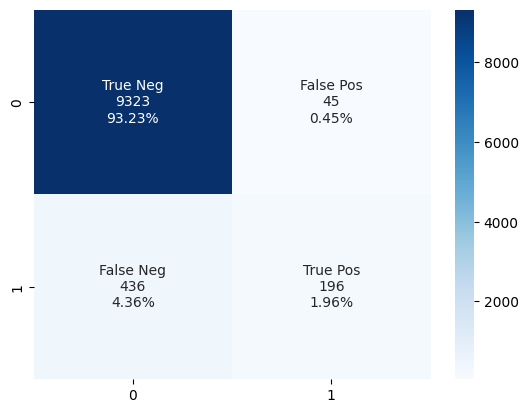

In [41]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [42]:
from sklearn.metrics import f1_score

f1_score(np.array(Y_test[0]),y_pred)

0.4490263459335624

In [43]:
test_df = pd.read_csv("../datasets/test_df.csv")
test_df

,qid,question_text
0,a4f3da3a3df9dd881edd,My period is due on my wedding day. How can I ...
1,9914c62ed3f69684d549,How many numbers higher than a million can be ...
2,8138ae48649e37091a91,"How come I feel nothing for my family, but sti..."
3,981b4753d17ef14d09f7,"In case of collapse of the Democratic party, w..."
4,452e2c705276ba16b7b7,Who is Émile Naoumoff?
...,...,...
306117,a352dff4fcc2571815ce,Did anyone get an update on Maruti Suzuki All ...
306118,ad4a8498d97c536c67b9,What 5 people in history do you find the most ...
306119,19784a27b55d4b453fda,How can I remove the tan on my forehead?
306120,370191dba26465997879,"If you are a well known hacker, will you be mo..."


In [31]:
y_pred = np.array([])
probas = clf.predict_proba(vect.transform(test_df["question_text"]))
y_pred = []
for i in range(len(probas)):
  if(probas[i][0]<0.765):
    y_pred.append(1)
  else:
    y_pred.append(0)

In [32]:
test_df.drop(["question_text"],axis=1,inplace=True)

In [33]:
test_df["target"]=y_pred

In [34]:
test_df.to_csv('../results/lr_withProb0.80_classWeight_withLang_maxdf0.25.csv', index=False)